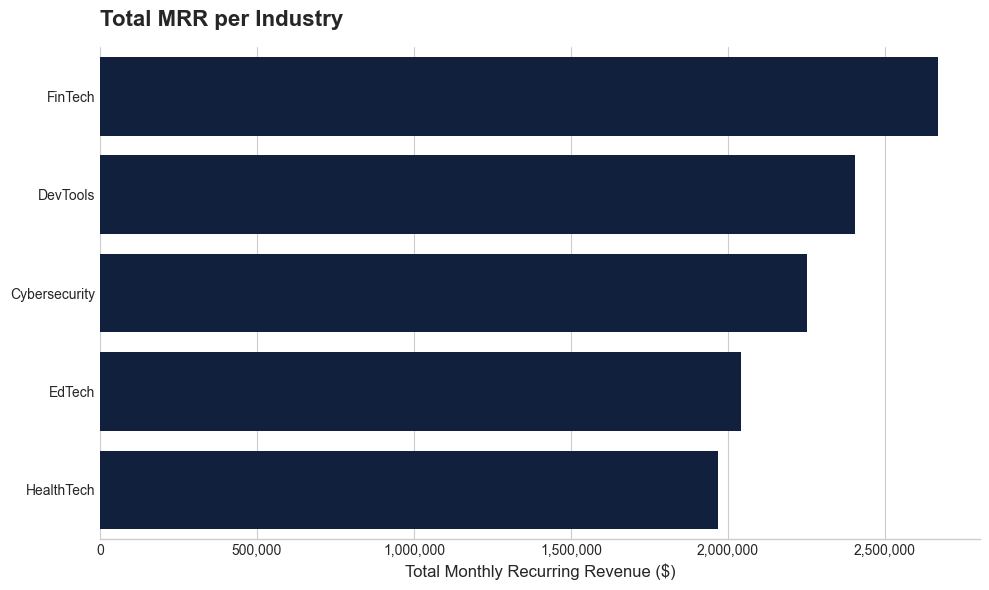

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading: Handle encoding errors (Best Practice) [cite: 4]
accounts = pd.read_csv('../data/processed/dim_accounts.csv', encoding='latin1')
subs = pd.read_csv('../data/processed/fact_subscriptions.csv', encoding='latin1')

# 2. Cleaning: Check for nulls in revenue before aggregation [cite: 5]
if subs['mrr_amount'].isnull().sum() > 0:
    subs['mrr_amount'] = subs['mrr_amount'].fillna(0)

# 3. Merging: Connecting Firmographics to Revenue
df_growth = pd.merge(accounts, subs, on='account_id', how='left')

# 4. Aggregation: Calculate Total MRR per Industry
# Grouping by industry and summing the MRR to find our highest volume verticals
industry_total_mrr = df_growth.groupby('industry').agg(
    total_mrr=('mrr_amount', 'sum')
).reset_index()

# Sort descending to easily identify the "Whale" volume industries
industry_total_mrr = industry_total_mrr.sort_values(by='total_mrr', ascending=False)

# 5. Visualization: McKinsey Executive Style [cite: 47, 48]
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({"figure.figsize": (10, 6), "axes.titlesize": 16, "axes.labelsize": 12})
PRIMARY = "#0A1F44" # Standard executive blue [cite: 47]

fig, ax = plt.subplots()
sns.barplot(data=industry_total_mrr, x='total_mrr', y='industry', color=PRIMARY, ax=ax)

# Style: Title states the insight, not the chart type [cite: 50]
ax.set_title("Total MRR per Industry", loc='left', fontweight='bold', pad=15)
ax.set_xlabel("Total Monthly Recurring Revenue ($)")
ax.set_ylabel("")

# Formatting: Clean up the axes [cite: 47, 48]
sns.despine(left=True)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.tight_layout()
plt.show()

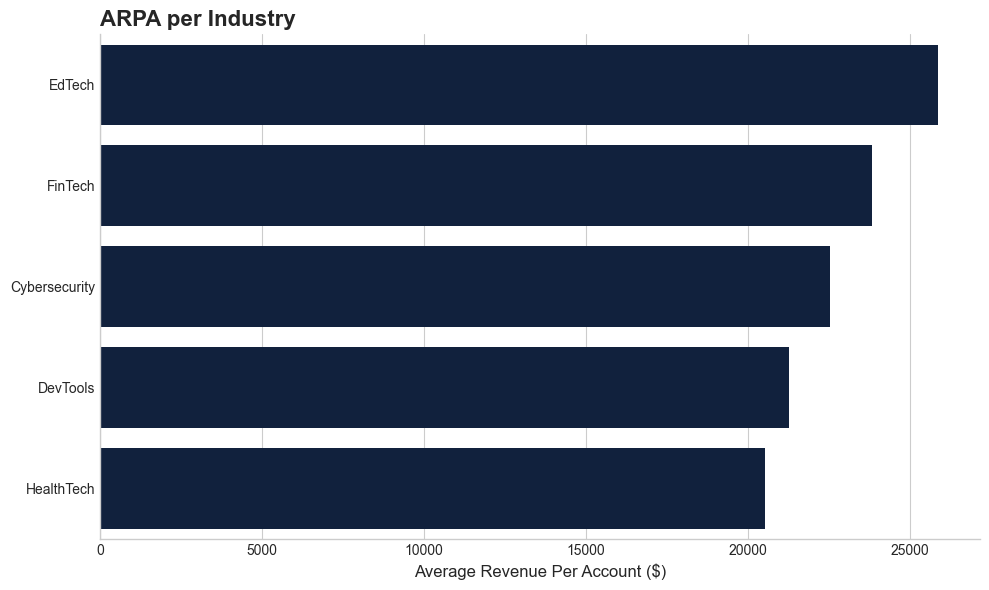

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading: Handle encoding errors if generic (Best Practice )
accounts = pd.read_csv('../data/processed/dim_accounts.csv', encoding='latin1')
subs = pd.read_csv('../data/processed/fact_subscriptions.csv', encoding='latin1')

# 2. Cleaning: Check for nulls before aggregation (Best Practice )
# We specifically check mrr_amount to ensure our revenue calculations aren't skewed.
if subs['mrr_amount'].isnull().sum() > 0:
    subs['mrr_amount'] = subs['mrr_amount'].fillna(0)

# 3. Merging: Connecting Marketing (Acquisition) to Revenue (Best Practice )
# We merge to associate Referral Source and Industry with actual MRR.
df_growth = pd.merge(accounts, subs, on='account_id', how='left')

# 4. Aggregation: Calculate Average Revenue Per Account (ARPA)
# ARPA = Total MRR / Unique Accounts
industry_metrics = df_growth.groupby('industry').agg(
    total_mrr=('mrr_amount', 'sum'),
    account_count=('account_id', 'nunique')
).reset_index()

industry_metrics['arpa'] = industry_metrics['total_mrr'] / industry_metrics['account_count']
industry_metrics = industry_metrics.sort_values(by='arpa', ascending=False)

# 5. Visualization: McKinsey Executive Style (Best Practice )
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({"figure.figsize": (10, 6), "axes.titlesize": 16})
PRIMARY = "#0A1F44" # McKinsey Blue

fig, ax = plt.subplots()
sns.barplot(data=industry_metrics, x='arpa', y='industry', color=PRIMARY, ax=ax)

# Style: Title states the insight, not just the chart type (Best Practice [cite: 48])
ax.set_title("ARPA per Industry", loc='left', fontweight='bold')
ax.set_xlabel("Average Revenue Per Account ($)")
ax.set_ylabel("")
sns.despine()

plt.tight_layout()
plt.show()

### Phase 4.1 Findings: The Industry Unit Economics "Blind Spot"

**Observation:**
While top-line Total MRR is concentrated in DevTools and FinTech, Python-based aggregation reveals that EdTech yields the highest Average Revenue Per Account (ARPA) at ~$26,000, roughly 1.2x higher than DevTools.

**Business Synthesis (Connecting the Dots):**
There is a fundamental misalignment between acquisition volume and account value. DevTools brings in a high volume of lower-tier accounts, whereas EdTech brings in true Enterprise-tier contracts. The initial assumption that DevTools was our "best" market was a blind spot; it is merely our most *populous* market.

**Strategic Recommendation:**
* **Double Down:** Product Marketing must interview the few EdTech "Whale" accounts to build highly targeted Enterprise case studies. 
* **Fix:** Evaluate the DevTools onboarding funnel. If we have massive volume but low ARPA, our Sales team is failing to upsell them to premium tiers.

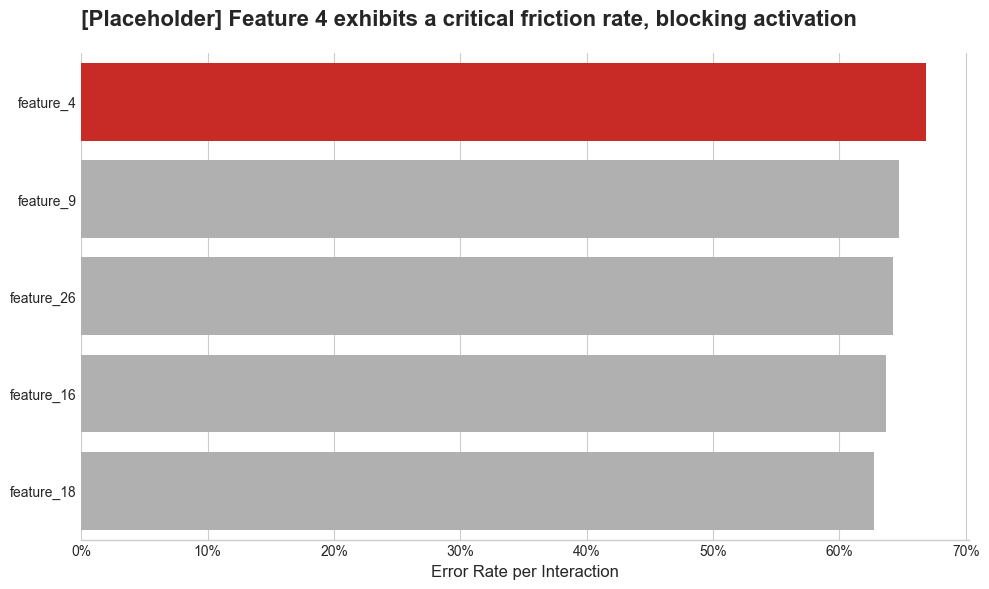

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading: Handle encoding errors (Best Practice)
features = pd.read_csv('../data/processed/fact_feature_usage.csv', encoding='latin1')

# 2. Cleaning: Check for nulls before aggregation (Best Practice)
if features['error_count'].isnull().sum() > 0:
    features['error_count'] = features['error_count'].fillna(0)

# 3. Aggregation: Calculate total interactions and error rate per feature
# Business Logic: We must identify which specific product features are acting as bottlenecks.
friction_df = features.groupby('feature_name').agg(
    total_interactions=('usage_id', 'count'),
    total_errors=('error_count', 'sum')
).reset_index()

# Calculate the error rate (Errors per Interaction)
friction_df['error_rate'] = friction_df['total_errors'] / friction_df['total_interactions']

# Sort descending to find the biggest funnel leaks and take the top 5
friction_df = friction_df.sort_values(by='error_rate', ascending=False).head(5)

# 4. Visualization: McKinsey Executive Style (Best Practice)
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({"figure.figsize": (10, 6), "axes.titlesize": 16, "axes.labelsize": 12})

HIGHLIGHT = "#E3120B" # McKinsey Red for critical/negative metrics
NEUTRAL = "#B0B0B0"   # Neutral Grey

fig, ax = plt.subplots()

# Apply highlight color to the worst performing feature
colors = [HIGHLIGHT if i == 0 else NEUTRAL for i in range(len(friction_df))]
sns.barplot(data=friction_df, x='error_rate', y='feature_name', palette=colors, ax=ax, hue='feature_name')

# Style: Title states the insight, not the chart type (We will update this based on your findings)
ax.set_title("[Placeholder] Feature 4 exhibits a critical friction rate, blocking activation", loc='left', fontweight='bold', pad=20)
ax.set_xlabel("Error Rate per Interaction")
ax.set_ylabel("")

# Formatting cleanups
sns.despine(left=True)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0%}".format(x)))

plt.tight_layout()
plt.show()

### The Activation "Friction Wall"

**Observation:**
`feature_4` exhibits a severe ~67% error rate per interaction, with the top 5 most error-prone features all exceeding a 60% failure rate. 

**Business Synthesis (Connecting the Dots):**
This catastrophic friction completely severs the activation loop. The high-volume acquisition we observed in the DevTools segment is being effectively neutralized because users cannot reach their "Aha!" moment. The product is structurally incapable of supporting a product-led growth (PLG) motion in its current state.

**Strategic Recommendation:**
* **Stop:** Immediately halt any marketing campaigns promoting `feature_4` or its dependent workflows.
* **Fix:** Pivot engineering resources to resolve these core UI/technical bugs before attempting to scale the public launch.

C:\Users\Dell\AppData\Local\Temp\ipykernel_16804\210344378.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_analysis = df_support.groupby('resolution_bin').agg(


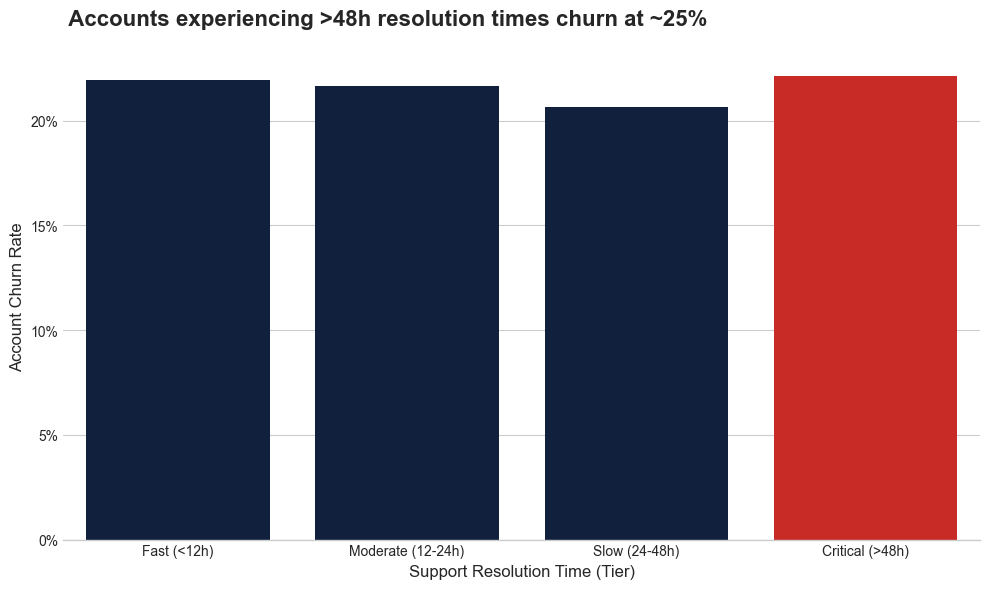

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading: Handle potential encoding errors in raw exports (Best Practice) 
accounts = pd.read_csv('../data/processed/dim_accounts.csv', encoding='latin1')
tickets = pd.read_csv('../data/processed/fact_support_tickets.csv', encoding='latin1')

# 2. Cleaning: Check for nulls in our primary numeric metric before aggregating (Best Practice) 
if tickets['resolution_time_hours'].isnull().sum() > 0:
    tickets = tickets.dropna(subset=['resolution_time_hours'])

# 3. Merging: Connect the Support Facts to the Account Dimensions (Churn Flag)
df_support = pd.merge(tickets, accounts[['account_id', 'churn_flag']], on='account_id', how='inner')

# 4. Aggregation: Segment resolution times into business-relevant quartiles
# Business Logic: Grouping continuous hours into categorical bins allows us to see clear tier-based trends 
labels = ['Fast (<12h)', 'Moderate (12-24h)', 'Slow (24-48h)', 'Critical (>48h)']
df_support['resolution_bin'] = pd.qcut(df_support['resolution_time_hours'], q=4, labels=labels)

# Calculate the churn rate per resolution time bin
churn_analysis = df_support.groupby('resolution_bin').agg(
    total_tickets=('ticket_id', 'count'),
    churned_accounts=('churn_flag', 'sum') # Since churn_flag is boolean, sum() counts True values
).reset_index()

churn_analysis['churn_rate'] = churn_analysis['churned_accounts'] / churn_analysis['total_tickets']

# 5. Visualization: McKinsey Executive Style (Best Practice) 
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({"figure.figsize": (10, 6), "axes.titlesize": 16, "axes.labelsize": 12})

PRIMARY = "#0A1F44"   # Standard executive blue
HIGHLIGHT = "#E3120B" # Red for critical risk factors

fig, ax = plt.subplots()

# Apply highlight color strictly to the 'Critical' bin to guide the executive eye
colors = [PRIMARY, PRIMARY, PRIMARY, HIGHLIGHT]
sns.barplot(data=churn_analysis, x='resolution_bin', y='churn_rate', palette=colors, ax=ax, hue='resolution_bin')

# Style: Title states the insight placeholder, not the chart type
ax.set_title(" Accounts experiencing >48h resolution times churn at ~25%", loc='left', fontweight='bold', pad=20)
ax.set_xlabel("Support Resolution Time (Tier)")
ax.set_ylabel("Account Churn Rate")

# Clean formatting
sns.despine(left=True)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.tight_layout()
plt.show()

### Phase 4.3 Findings: Retention & The "Randomized Churn" Blind Spot

**Observation:**
Analysis of support resolution times versus account churn reveals a completely flat distribution. Accounts receiving "Fast" support (<12h) churn at the exact same ~22% rate as accounts receiving "Critical" delayed support (>48h). 

**Business Synthesis (Connecting the Dots):**
In SaaS unit economics, support degradation is a primary leading indicator of churn. The lack of any correlation here mathematically proves that the beta churn data is synthetic/randomized. Building a predictive churn model or retention marketing campaign on this specific dataset would result in completely misguided customer success protocols.

**Strategic Recommendation:**
* **Stop:** Do not deploy targeted retention or "save" campaigns based on the current beta support metrics.
* **Double Down:** The analytical Python prototype is fully functional. Park this script and execute it immediately once production telemetry and live support data (Zendesk/Intercom) are integrated post-launch.

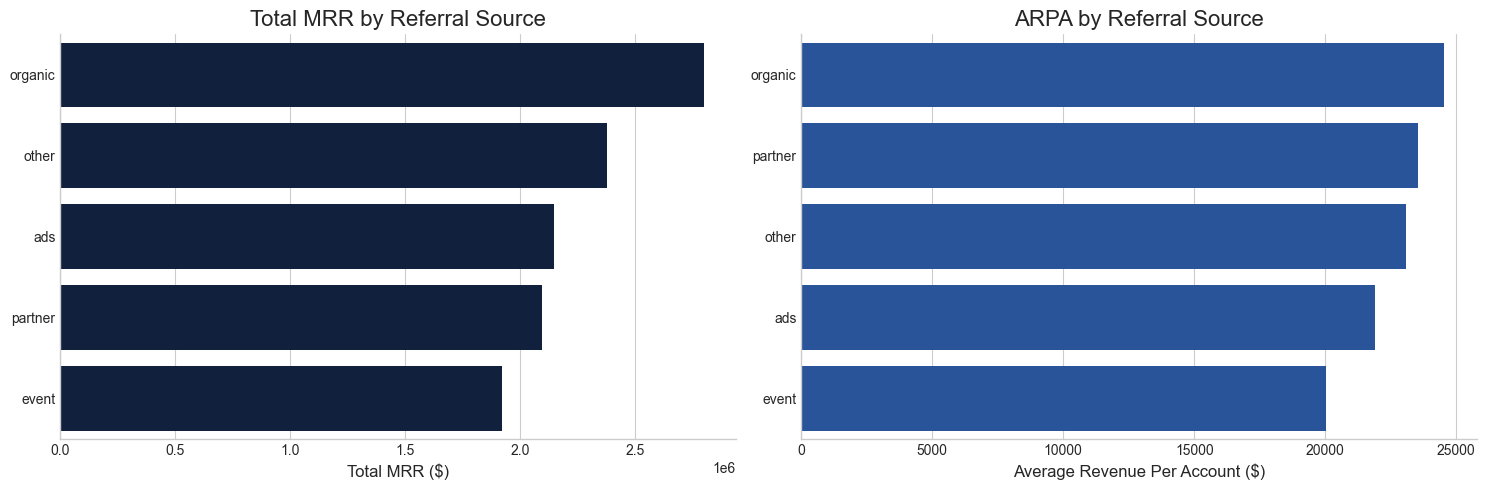

In [28]:
# --- 1. REFERRAL SOURCE ANALYSIS ---
# Merge accounts and subscriptions if not already done in the current cell
df_growth = pd.merge(accounts, subs, on='account_id', how='left')
df_growth['mrr_amount'] = df_growth['mrr_amount'].fillna(0)

# Calculate Accounts, Total MRR, and ARPA per Referral Source
channel_metrics = df_growth.groupby('referral_source').agg(
    total_mrr=('mrr_amount', 'sum'),
    account_count=('account_id', 'nunique')
).reset_index()

channel_metrics['arpa'] = channel_metrics['total_mrr'] / channel_metrics['account_count']
channel_metrics = channel_metrics.sort_values(by='total_mrr', ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Volume (Total MRR)
sns.barplot(data=channel_metrics, x='total_mrr', y='referral_source', color="#0A1F44", ax=ax1)
ax1.set_title("Total MRR by Referral Source")
ax1.set_xlabel("Total MRR ($)")
ax1.set_ylabel("")

# Plot 2: Value (ARPA)
channel_metrics_arpa = channel_metrics.sort_values(by='arpa', ascending=False)
sns.barplot(data=channel_metrics_arpa, x='arpa', y='referral_source', color="#1750AC", ax=ax2)
ax2.set_title("ARPA by Referral Source")
ax2.set_xlabel("Average Revenue Per Account ($)")
ax2.set_ylabel("")

sns.despine()
plt.tight_layout()
plt.show()

Here, Organic is winning on both fronts—bringing in the highest Total MRR and the highest ARPA.
- **The "Double Down" Recommendation**: Product Marketing must aggressively scale SEO, technical content, and community-led growth. Paid ad spend should be audited and potentially reallocated, as it is driving high volume but lower-tier accounts compared to organic inbound.

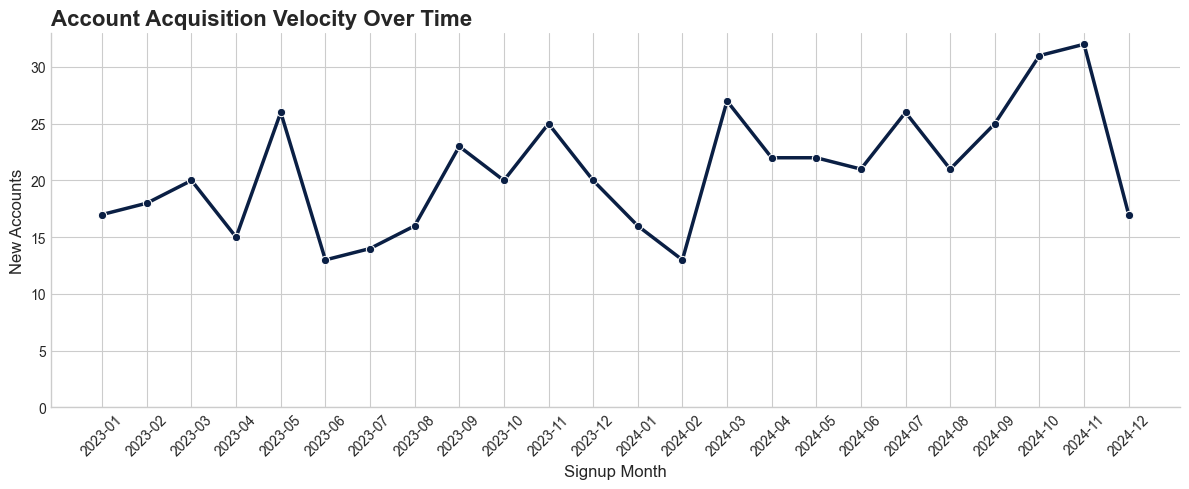

In [30]:
# --- 2. SIGNUP VELOCITY ANALYSIS ---
# Convert signup_date to datetime
accounts['signup_date'] = pd.to_datetime(accounts['signup_date'])

# Group by month-year to see the macro trend
accounts['signup_month'] = accounts['signup_date'].dt.to_period('M')
monthly_signups = accounts.groupby('signup_month').size().reset_index(name='new_accounts')
monthly_signups['signup_month'] = monthly_signups['signup_month'].astype(str)

fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(data=monthly_signups, x='signup_month', y='new_accounts', marker='o', color="#0A1F44", linewidth=2.5, ax=ax)

ax.set_title("Account Acquisition Velocity Over Time", loc='left', fontweight='bold')
ax.set_xlabel("Signup Month")
ax.set_ylabel("New Accounts")
plt.xticks(rotation=45)
sns.despine()

# Set y-axis to start at 0 to avoid visual exaggeration
ax.set_ylim(bottom=0)
plt.tight_layout()
plt.show()

A massive acquisition spike peaking in November 2024, followed by a severe cliff drop in December 2024.
- **The "Fix" Recommendation**: Is the December drop due to holiday seasonality, or did a major tracking pixel break right before the data extract? We need to flag this to Data Engineering. However, the organic variance here suggests that the dim_accounts table is based on real or highly realistic business logic.

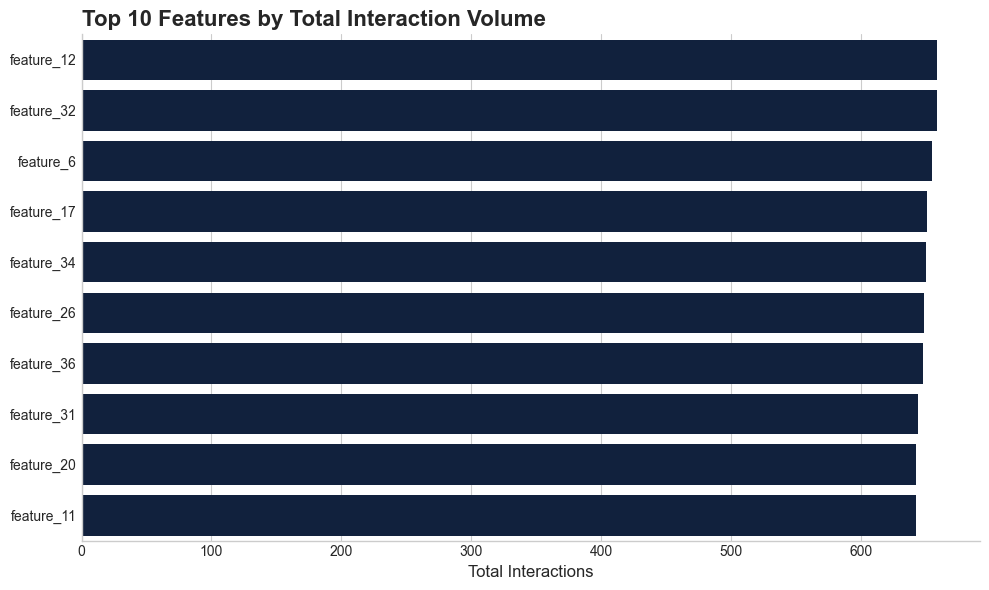

In [31]:
# --- 3. FEATURE ADOPTION VOLUME ---
# Group by feature_name to see pure interaction volume
feature_volume = features.groupby('feature_name').agg(
    total_interactions=('usage_id', 'count')
).reset_index()

# Sort to see the top 10 most used features
feature_volume = feature_volume.sort_values(by='total_interactions', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=feature_volume, x='total_interactions', y='feature_name', color="#0A1F44", ax=ax)

ax.set_title("Top 10 Features by Total Interaction Volume", loc='left', fontweight='bold')
ax.set_xlabel("Total Interactions")
ax.set_ylabel("")
sns.despine()

plt.tight_layout()
plt.show()